# <b>ELECTRIC CAR SHARING PROJECT</b>

# Data Cleaning

> ## 1. Defining the Question

> ##### a) Specifying the Question

>> we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

>> In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

> ##### b) Defining the Question

>> Is the number of blue cars taken same as the number of blue cars returned on weekdays?

> ## 2. Reading the Data

In [0]:
# Importing the necessary Python libraries.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
plt.style.use('dark_background')

In [66]:
# Loading our dataset and creating a pandas dataframe.
#
url = "autolib_daily_events_postal_code.csv"
df = pd.read_csv(url)
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [67]:
# Getting the dataset information
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## 3. Checking the Data

In [68]:
# Previewing the top of our dataset
#
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [69]:
# Previewing the bottom of our dataset
#
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [70]:
# Determining the number of records in our dataset
#
df.shape

(16085, 13)

## 4. Tidying the Dataset

In [71]:
# Checking for duplicate values in the dataframe.
#
df.duplicated().any()

False

In [72]:
# Checking the column names
#
# ----
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

## 5. Checking for outliers

Outlier ranges for Taken Cars.
        0      1
0   20.0    0.0
1  135.0  307.0
2    0.0    0.0
3    4.0   10.0
4    1.0    0.0
5   10.0   23.0
Outlier ranges for Taken Cars.
 [array([ 20.,  20., 135., 135.,  20.]), array([0., 0., 4., 4., 0.]), array([ 1.,  1., 10., 10.,  1.])]


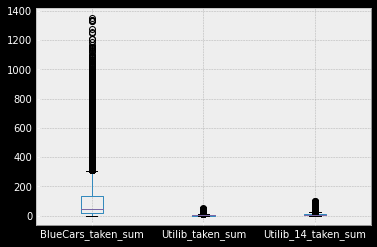

In [112]:
# OUTLIERS : Checking for Outliers by plotting a visual for the taken cars only.
# 
# defining a funtion that takes the dataset name and numeric columns list as arguments 
# then returns a visual for the columns_list 
#
plt.style.use('bmh')

out_taken = df[['BlueCars_taken_sum', 'Utilib_taken_sum','Utilib_14_taken_sum']]
out_returned = df[['BlueCars_returned_sum', 'Utilib_returned_sum', 'Utilib_14_returned_sum',]] 
out_slots = [['Slots_freed_sum', 'Slots_taken_sum']]


# Plotting Outliers for the Taken vehicles
#
_t, taken = pd.DataFrame.boxplot(out_taken, return_type='both',  widths = 0.2)

outliers = [flier.get_ydata() for flier in taken["fliers"]]
out_liers = [i.tolist() for i in outliers]
boxes = [box.get_ydata() for box in taken["boxes"]]
whiskers = [whiskers.get_ydata() for whiskers in taken["whiskers"]]

# Whiskers indicate the extensions from the top and bottom. 
# In our case it's in the range of 4 to 7
#
whiskers = pd.DataFrame(whiskers)

print("Outlier ranges for Taken Cars.\n", whiskers)


print("Outlier ranges for Taken Cars.\n", boxes)

Outlier ranges for Returned Cars.
        0      1
0   20.0    0.0
1  135.0  307.0
2    0.0    0.0
3    4.0   10.0
4    1.0    0.0
5   10.0   23.0


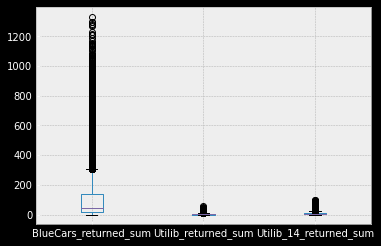

In [74]:
# OUTLIERS : Checking for Outliers by plotting a visual for the returned cars only.
# 
# defining a funtion that takes the dataset name and numeric columns list as arguments 
# then returns a visual for the columns_list 
#
plt.style.use('bmh')

out_returned = df[['BlueCars_returned_sum', 'Utilib_returned_sum', 'Utilib_14_returned_sum',]] 

# Plotting Outliers for the Returned vehicles
#
_r, returned = pd.DataFrame.boxplot(out_returned, return_type='both',  widths = 0.2)


outliers = [flier.get_ydata() for flier in returned["fliers"]]
out_liers = [i.tolist() for i in outliers]
boxes = [box.get_ydata() for box in returned["boxes"]]
whiskers = [whiskers.get_ydata() for whiskers in returned["whiskers"]]

# Whiskers indicate the extensions from the top and bottom. 
# In our case it's in the range of 4 to 7
#
whiskers = pd.DataFrame(whiskers)

print("Outlier ranges for Returned Cars.\n", whiskers)



In [0]:
# Fucntion for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [0]:
df2 = df[['BlueCars_taken_sum',	'BlueCars_returned_sum',	'Utilib_taken_sum',\
       'Utilib_returned_sum',	'Utilib_14_taken_sum',	'Utilib_14_returned_sum',\
       'Slots_freed_sum',	'Slots_taken_sum']]

In [77]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in df2:
    rows, columns = df2.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(df2[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

BlueCars_taken_sum has 468 outliers in total, which is 2.9% of data
BlueCars_returned_sum has 460 outliers in total, which is 2.9% of data
Utilib_taken_sum has 391 outliers in total, which is 2.4% of data
Utilib_returned_sum has 409 outliers in total, which is 2.5% of data
Utilib_14_taken_sum has 419 outliers in total, which is 2.6% of data
Utilib_14_returned_sum has 412 outliers in total, which is 2.6% of data
Slots_freed_sum has 490 outliers in total, which is 3.0% of data
Slots_taken_sum has 474 outliers in total, which is 2.9% of data


> We determine that outliers do exist in our dataset.
>> * BlueCars_taken_sum has 468 outliers in total, which is 2.9% of data
>> * BlueCars_returned_sum has 460 outliers in total, which is 2.9% of data
>> * Utilib_taken_sum has 391 outliers in total, which is 2.4% of data
>> * Utilib_returned_sum has 409 outliers in total, which is 2.5% of data
>> * Utilib_14_taken_sum has 419 outliers in total, which is 2.6% of data
>> * Utilib_14_returned_sum has 412 outliers in total, which is 2.6% of data
>> * Slots_freed_sum has 490 outliers in total, which is 3.0% of data
>> * Slots_taken_sum has 474 outliers in total, which is 2.9% of data

In [78]:
# Droping ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(df2))
print(z)


[[0.08589624 0.12352149 0.12008686 ... 0.03114623 0.01206926 0.05042308]
 [0.15061389 0.17204012 0.46403223 ... 0.04656234 0.00711774 0.01206806]
 [0.06511162 0.07055302 0.63600491 ... 0.51281378 0.0838657  0.0838195 ]
 ...
 [0.50116785 0.49010667 0.46403223 ... 0.66823093 0.43418308 0.43397331]
 [0.61981688 0.6033168  0.12008686 ... 0.51281378 0.43418308 0.43397331]
 [0.66835512 0.6680083  0.29205954 ... 0.66823093 0.43418308 0.43397331]]


In [79]:
# Confirming that our outliers have been dropped from the dataset.
#
df_o = df2[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {df2.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

Previous dataframe size : 16085
New dataframe size: 15303


In [0]:
# Saving our Data without outliers
#
df2.to_csv("Outliers_removed.csv")

# Exploratory Analysis

> ## i) Univariate Analysis

In [0]:
electric_df = pd.read_csv("Outliers_removed.csv")

In [82]:
electric_df.columns

Index(['Unnamed: 0', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
       'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum',
       'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [83]:
# Checking our columns 
#
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [84]:
# Adding others variables to our clean dataframe
#
electric_df[['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type']] = df[['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type']]
electric_df.head()

,Unnamed: 0,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Postal code,date,n_daily_data_points,dayOfWeek,day_type
0,0,110,103,3,2,10,9,22,20,75001,1/1/2018,1440,0,weekday
1,1,98,94,1,1,8,8,23,22,75001,1/2/2018,1438,1,weekday
2,2,138,139,0,0,2,2,27,27,75001,1/3/2018,1439,2,weekday
3,3,104,104,2,2,9,8,25,21,75001,1/4/2018,1320,3,weekday
4,4,114,117,3,3,6,6,18,20,75001,1/5/2018,1440,4,weekday


In [85]:
# Drawing frequency tables from our dataframe variables.
#

print(electric_df['day_type'].value_counts())  
print('/n')

weekday    11544
weekend     4541
Name: day_type, dtype: int64
/n


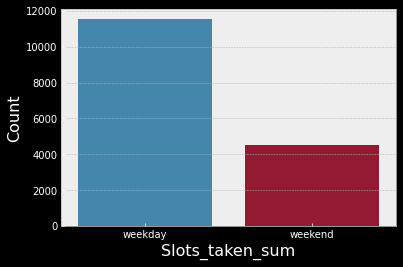

In [86]:
# Plotting bar graphs for our categorical variables frequencies
#
fig = plt.plot(1,1)

sns.barplot(electric_df['day_type'].value_counts().keys(), electric_df['day_type'].value_counts())
plt.xlabel(col, fontsize=16)
plt.ylabel('Count',fontsize=16)


plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


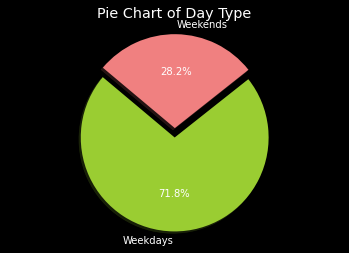

In [87]:
#plotting our frequencies on pie charts to visualise our percentage distributions
labels = ['Weekdays', 'Weekends']
sizes  = [electric_df['day_type'].value_counts()]
colors = ['yellowgreen','lightcoral']

# Highlights a particular Value in plot
explode = (0.1, 0)  

# Plotting our pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Day Type')
plt.show()

In [88]:
# Describing our numeric variables
numeric_col = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',\
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',\
       'Slots_freed_sum', 'Slots_taken_sum']

electric_df[numeric_col].describe()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


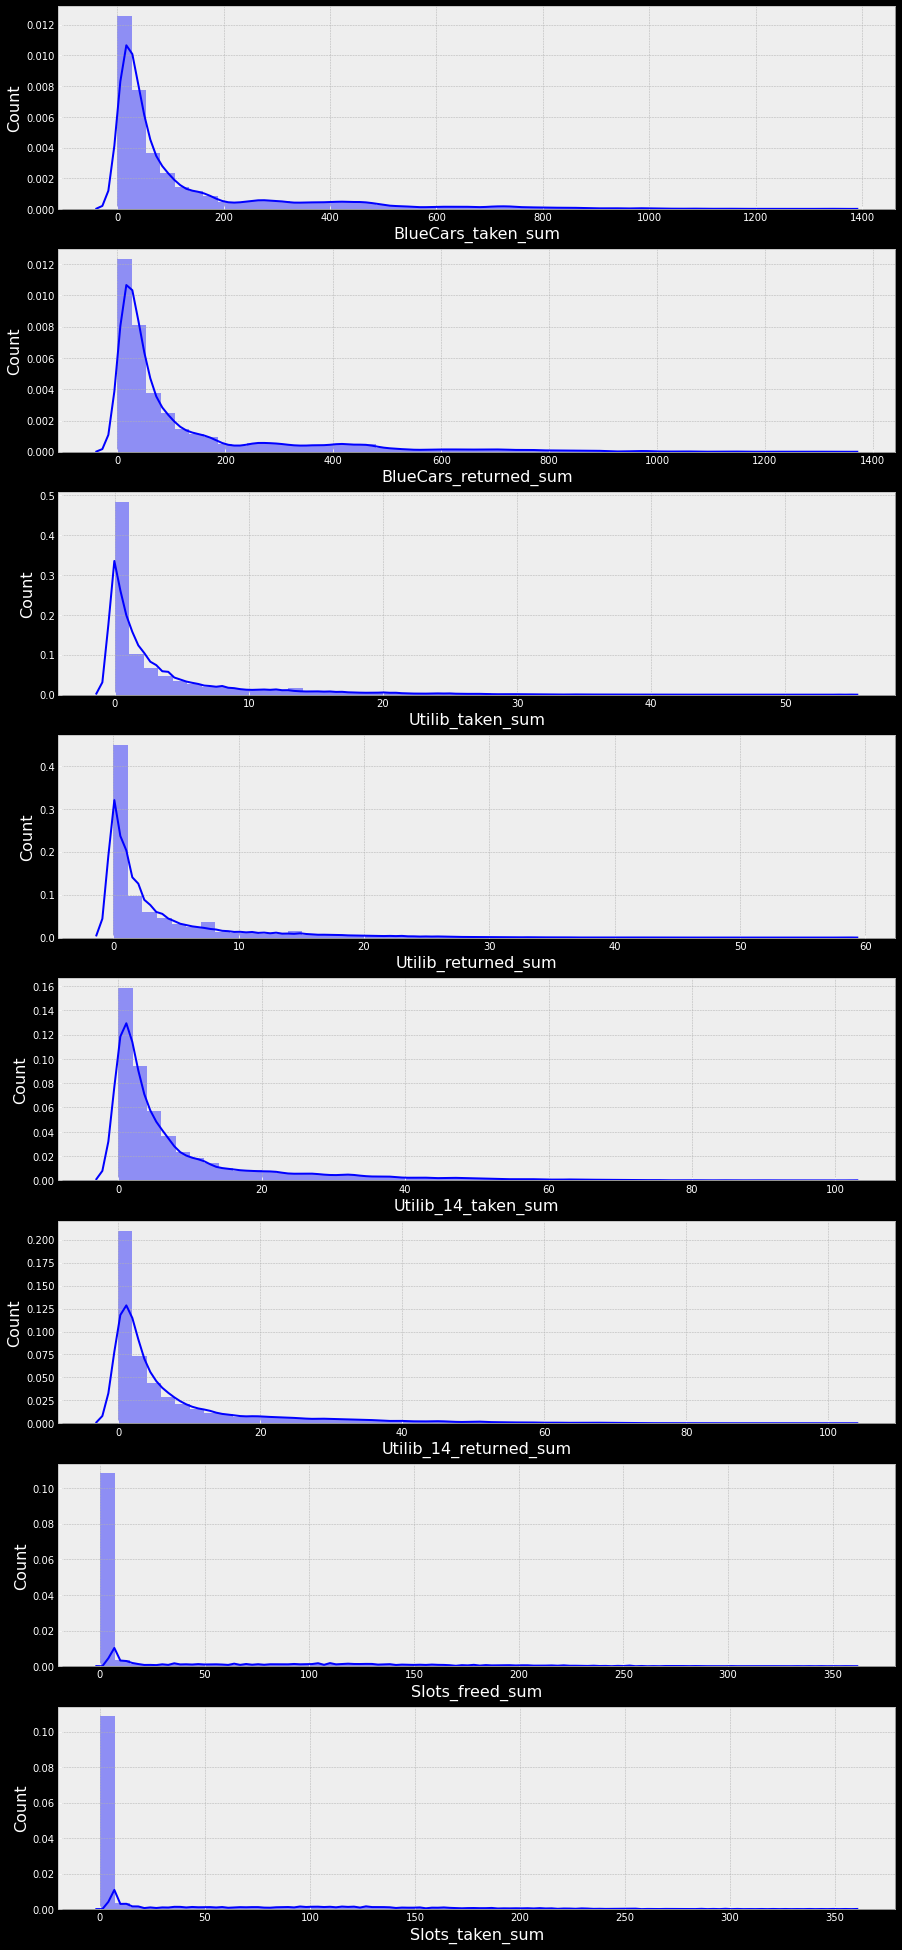

In [89]:
# Frequency distribution for our numeric variables
#
numeric_col = ['BlueCars_taken_sum',	'BlueCars_returned_sum',	'Utilib_taken_sum',\
       'Utilib_returned_sum',	'Utilib_14_taken_sum',	'Utilib_14_returned_sum',\
       'Slots_freed_sum',	'Slots_taken_sum']

fig, ax = plt.subplots(len(numeric_col), figsize=(15,35))

for i, col_val in enumerate(numeric_col):
  sns.distplot(electric_df[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_xlabel(col_val, fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

> iii) Conclusion

>> * Our columns seem to have data that is skewed on the left side. This scenario appears to occur on each and every numerical variable plotted with zero mark having the largest values for all columns plotted.

> ## ii) Bivariate Analysis

>> * ## Data Correlation

### a) Numeric and Numeric Variables

>  #### Plotting Scatter plots

Text(0.5, 1.0, 'Pairplot of Numeric variables.')

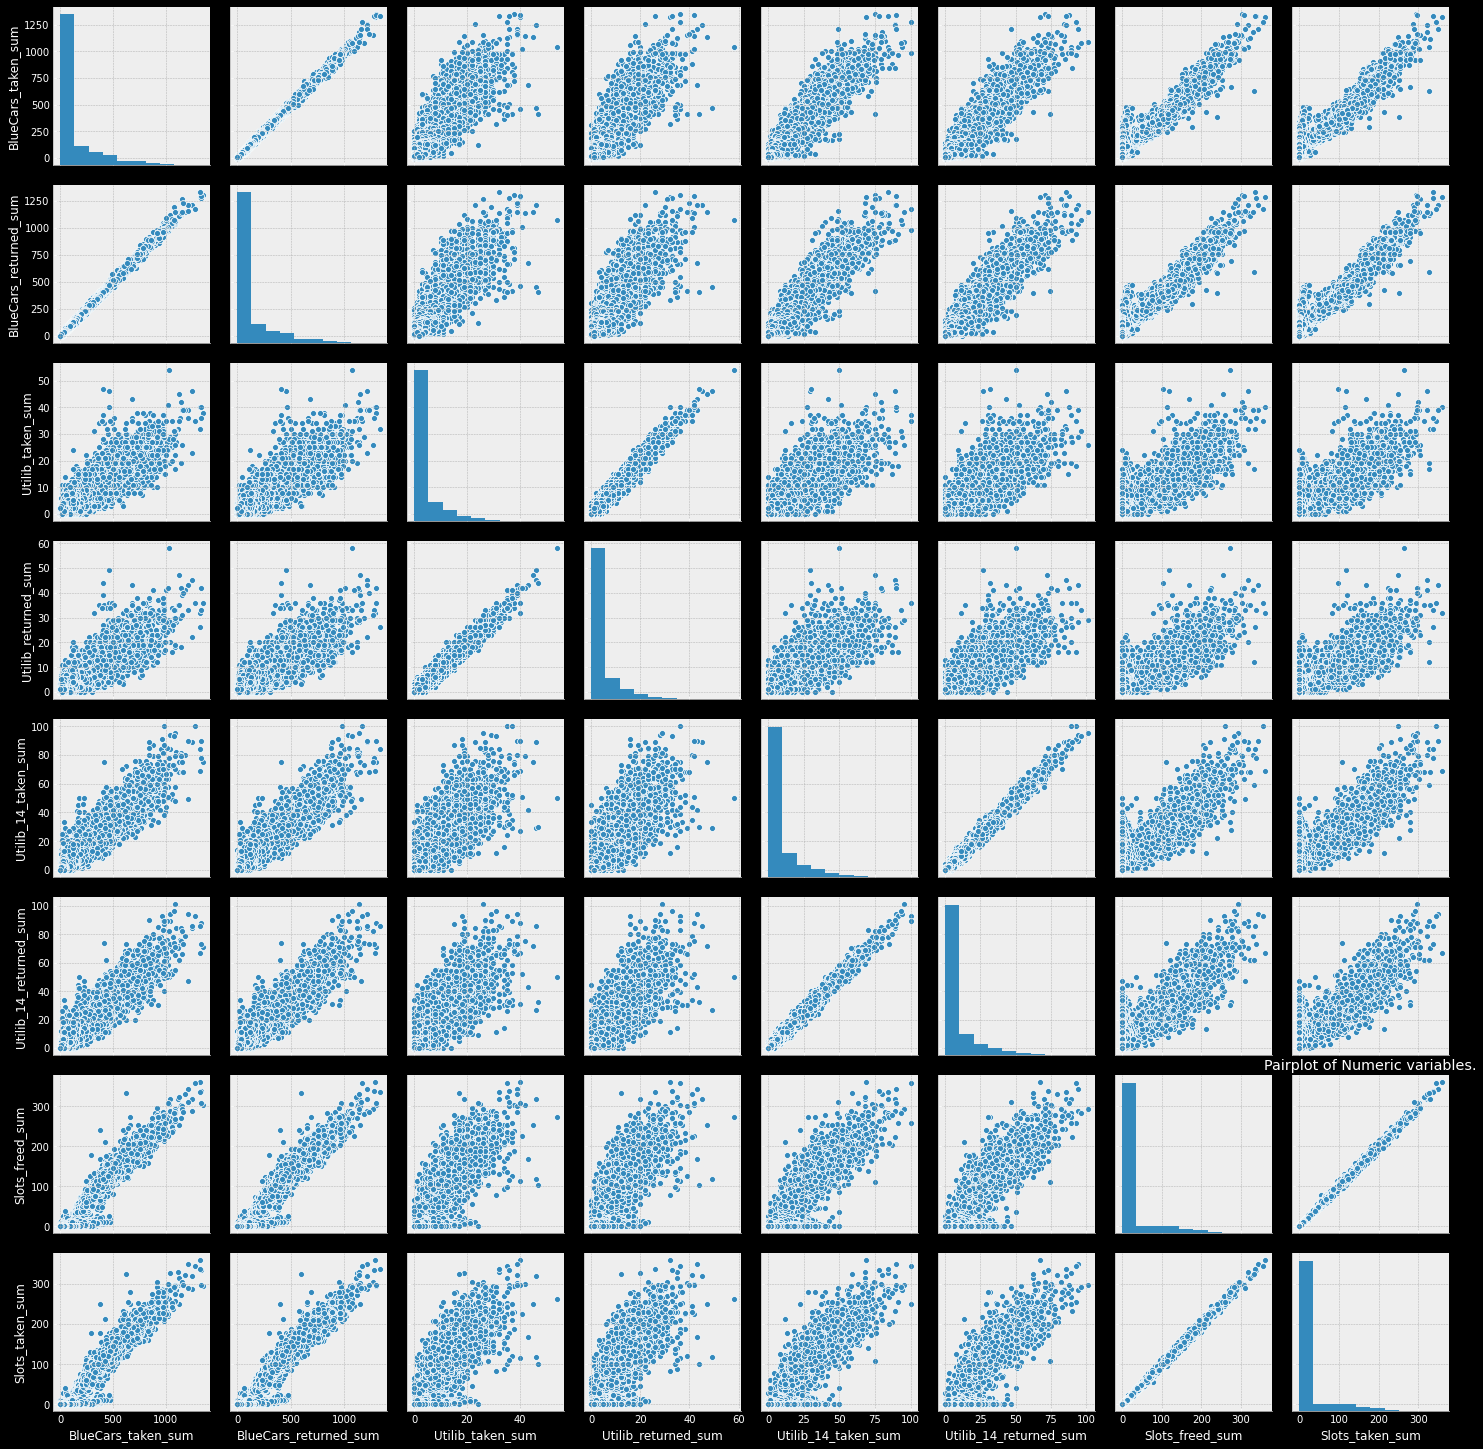

In [90]:
# drawing scatter plots on numeric variables to visualize any correlation
sns.pairplot(electric_df[numeric_col])
plt.title("Pairplot of Numeric variables.")

> #### Plotting a heatmap of our data

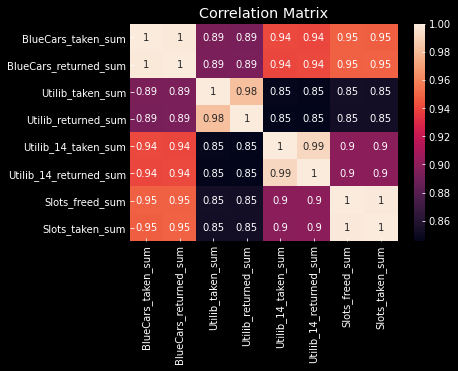

In [91]:
# Plotting heatmap to show how our numeric variables correlate
sns.heatmap(electric_df[numeric_col].corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

>>> #### Calculating Correlations of Numeric Variables.

In [92]:
# Calculating the correlations of the numeric variables between Bluecars taken and Bluecars returned
pearson_coeff = electric_df['BlueCars_taken_sum'].corr(electric_df['BlueCars_returned_sum'], method="pearson")
print(f"Correlation between Bluecars taken and Bluecars returned is {pearson_coeff}")

# Calculating the correlations of the numeric variables between Utilib cars taken and Utilib cars returned.
pearson_coeff = electric_df['Utilib_taken_sum'].corr(electric_df['Utilib_returned_sum'], method="pearson")
print(f"Correlation between Utilib cars taken and Utilib cars returned is {pearson_coeff}")

# Calculating the correlations of the numeric variables between Utilib cars taken and Utilib cars returned.
pearson_coeff = electric_df['Utilib_14_taken_sum'].corr(electric_df['Utilib_14_returned_sum'], method="pearson")
print(f"Correlation between Utilib 14 cars taken and Utilib 14 cars returned is {pearson_coeff}")

Correlation between Bluecars taken and Bluecars returned is 0.9986597051672199
Correlation between Utilib cars taken and Utilib cars returned is 0.9819819805363551
Correlation between Utilib 14 cars taken and Utilib 14 cars returned is 0.9920620707048171


> ### b) Correlation between Numeric and Categorical variables.

In [0]:
# Defining our functions for this exercise
# Defining a function that retuns a list for specific filter conditions
# The frame with data, what we are chasing, list to use in x_axis
def list_maker(frame, query, x_axis_list): 
    alist = []
    scale = x_axis_list
    for x in scale:
        x = float(x)
        try:
            alist.append(frame[(x, query)])
        except:
            alist.append(0)
    return alist

#a function that takes a dataframe, numeric column and categorical column and returns
#a frequency table and it's visual, dependent on function list_maker
def numeric_vs_categorical_visualizer(dataframe, numeric_col_name = None, categorical_col_name = None):
    result = dataframe.groupby([numeric_col_name, categorical_col_name])[numeric_col_name].count()

    #our values lists and plot
    ages = [x for x in range(int(max(dataframe[numeric_col_name])) + 1)]
    plt.style.use('dark_background')
    for x in dataframe[categorical_col_name].unique():
        w = x
        x = list_maker(result, x, ages)
        plt.plot(ages, x, label=w)
        plt.xlabel(numeric_col_name)
        plt.ylabel('Count')
        plt.title(f'{categorical_col_name} Count vs {numeric_col_name}')
    plt.legend()
    plt.show()

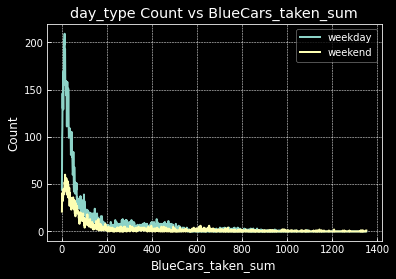

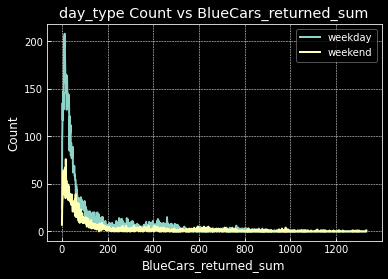

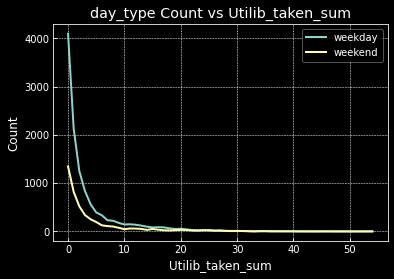

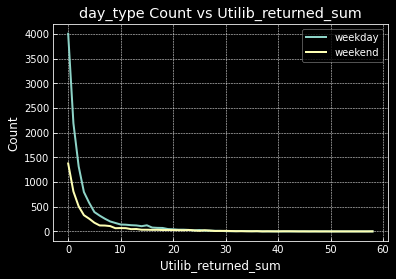

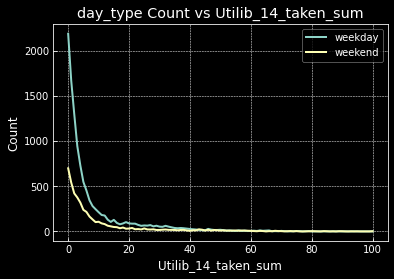

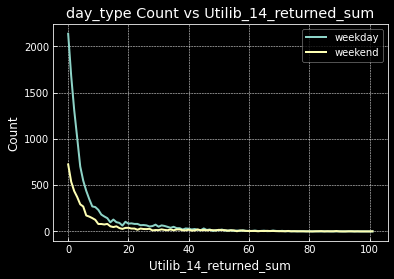

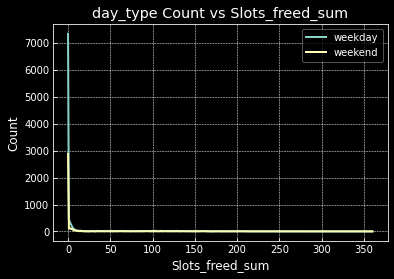

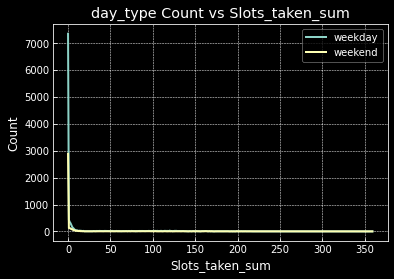

In [108]:
# Plotting Categorical column Day type against all the numerical columns in our dataframe.
#
numeric_column = ['BlueCars_taken_sum', 'BlueCars_returned_sum',\
       'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum',\
       'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']
categorical = ['day_type']

for numeric in numeric_column:
  numeric_vs_categorical_visualizer(electric_df, numeric_col_name=numeric, categorical_col_name=category)

# Hypothesis Testing

> ### Describing the Hypothesis question.

>> Was the number of Bluecars taken different from the number of Bluecars returned on a weekday?

>>> * Ho = Number of Bluecars taken on a weekday is equal to the number of Bluecars returned.
>>> * Ha = Number of Bluecars take on a weekday is actually greater than the number of Bluecars returned on a weekday.


In [93]:
# Calculating the sum of number of Blue cars Tekn or returned on both weekdays and weekends.
#
taken = electric_df.groupby(['day_type'])['BlueCars_taken_sum'].sum().sort_values(ascending=False)
returned = electric_df.groupby(['day_type'])['BlueCars_returned_sum'].sum().sort_values(ascending=False)

print(f"Sume of cars taken: \n{taken}\n")
print(f"Sume of cars returned: \n{returned}")

Sume of cars taken: 
day_type
weekday    1339435
weekend     686100
Name: BlueCars_taken_sum, dtype: int64

Sume of cars returned: 
day_type
weekday    1334941
weekend     690365
Name: BlueCars_returned_sum, dtype: int64


In [117]:
# Selecting the data for the number of cars taken or returned on weekdays ONLY
#
weekday_cars = electric_df[['day_type', 'BlueCars_taken_sum',	'BlueCars_returned_sum']]
weekday_cars = weekday_cars[weekday_cars['day_type'] == 'weekday']
weekday_cars.head()

,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,weekday,110,103
1,weekday,98,94
2,weekday,138,139
3,weekday,104,104
4,weekday,114,117


In [118]:
# Getting more details about our data
#
weekday_cars.describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,11544.000000,11544.000000
mean,116.028673,115.639380
std,169.626905,168.344751
min,0.000000,0.000000
25%,18.000000,19.000000
50%,42.000000,42.000000
75%,126.000000,126.000000
max,1093.000000,1056.000000


In [119]:
weekday_cars['day_type'].unique()

array(['weekday'], dtype=object)

In [120]:
# Prewieing the size of our dataset
#
weekday_cars.shape[0]

# Our dataset contains 16085 total number of  cars taken or returned
# on a Weekday.

11544

> ### Performing Simple Random Sampling

In [121]:
# Selecting the sample.
#
car_sample = weekday_cars.sample(n=25, replace=False)
print(car_sample)

      day_type  BlueCars_taken_sum  BlueCars_returned_sum
3094   weekday                 535                    524
428    weekday                 237                    220
10463  weekday                   2                      3
1851   weekday                 483                    469
1982   weekday                 460                    463
2230   weekday                 943                    928
4503   weekday                 184                    189
11297  weekday                  14                      8
8432   weekday                  18                     19
9684   weekday                  78                     72
13329  weekday                  24                     27
4900   weekday                  76                     82
7368   weekday                 153                    141
11344  weekday                  12                     14
3922   weekday                  10                     11
15393  weekday                  33                     43
5924   weekday

> ## Describing our hypothesis

>> * Null Hypothesis(Ho)  Cars taken == Cars returned.
>> * Alternative Hypothesis (Ha)  Cars taken != Cars returned.
>> * Number of Samples = 25
>> * Level of Significance = 0.05

> ## Perfoming Hypothesis Testing

> Calculating the Mean, Standard Deviation and the Number of samples available.

In [122]:
# Perfoming our t-test on our randomly generated sample
# We considered a t-test because
# the number of samples in question is less than 30
# and We want to get the probability of two events 
# where the number of cars returned is either greater or less than 
# the number of cars taken on a particular week.
#
from scipy.stats import ttest_ind_from_stats

# Calculating the mean
taken_mean = car_sample['BlueCars_taken_sum'].mean()
returned_mean = car_sample['BlueCars_returned_sum'].mean()

print(f"Mean of taken cars: {taken_mean}\nMean of returned cars: {returned_mean}\n")

# Calculating the standard deviation for the two columns.
#
taken_sd = car_sample['BlueCars_taken_sum'].std()
returned_sd = car_sample['BlueCars_returned_sum'].std()
print(f"Standard Deviation for: \nTaken cars: {taken_sd}\nReturned cars:{returned_sd}\n")

# Number of samples
#
t1,t2 = car_sample['BlueCars_taken_sum'].shape[0], car_sample['BlueCars_returned_sum'].shape[0]
print(f"The number of samples for:\nTaken cars:{t1}\nReturned cars:{t2}\n" )


Mean of taken cars: 187.52
Mean of returned cars: 184.04

Standard Deviation for: 
Taken cars: 248.4347868824601
Returned cars:242.37015080244518

The number of samples for:
Taken cars:25
Returned cars:25



>> Calculating the test statistic and the p-value.

In [123]:
# Calculation the test statistics and the p-value
#
ttest, p_value = ttest_ind_from_stats(taken_mean, taken_sd,t1, returned_mean, returned_sd,t2)

print("---------------------------------------\n")
print(f"The test statistic is: {ttest}")
print(f"The p-value is: {p_value}\n")

if p_value < 0.05:
   print("We reject the null hypothesis.")
else:
  print("We fail to reject the null hypothesis.")

---------------------------------------

The test statistic is: 0.050132824157968076
The p-value is: 0.9602245802719682

We fail to reject the null hypothesis.


> ## Conclusion

> * From the test we perfomed we discover that the p-value is greater than the level of significance meaning that we failed to reject the null hypothesis and thus rejected the alternative hypothesis
> * Therefore we do not have enough evidence to support our alternative hypothesis, which claims that the number of cars returned on weekdays is not equal to the number of cars returned.